Все файлы находят тут

https://github.com/kakonanov/MIPT_MathMethodsDataVis2021


In [3]:
! git clone https://github.com/kakonanov/MIPT_MathMethodsDataVis2021.git

Cloning into 'MIPT_MathMethodsDataVis2021'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 1), reused 9 (delta 1), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Инициализируем граф из файла, словарь с позициями вершин

Считаем, что граф бинарный

In [5]:
g = nx.read_graphml("/content/MIPT_MathMethodsDataVis2021/task1/tree-42n.xml")
DiGraph = nx.DiGraph()
DiGraph.add_nodes_from(g.nodes())
DiGraph.add_edges_from(g.edges())
Graph = nx.to_dict_of_lists(DiGraph)
pos = {}

In [6]:
def HV():
    root = [n for n, d in DiGraph.in_degree() if d==0][0]
    pos[root] = np.array([0, 0])
    create_HV(root)

Функция для определения координат

In [7]:
def create_HV(vertex):
    children = Graph[vertex]
    if len(children) == 0:
        return pos[vertex][0]
    elif len(children) == 1:
        pos[children[0]] = pos[vertex] - [0, 1]
        return create_HV(children[0])
    elif len(children) == 2:
        pos[children[0]] = pos[vertex] - [0, 1]
        shift = create_HV(children[0])
        pos[children[1]] = np.array([shift + 1, pos[vertex][1]])
        return create_HV(children[1])

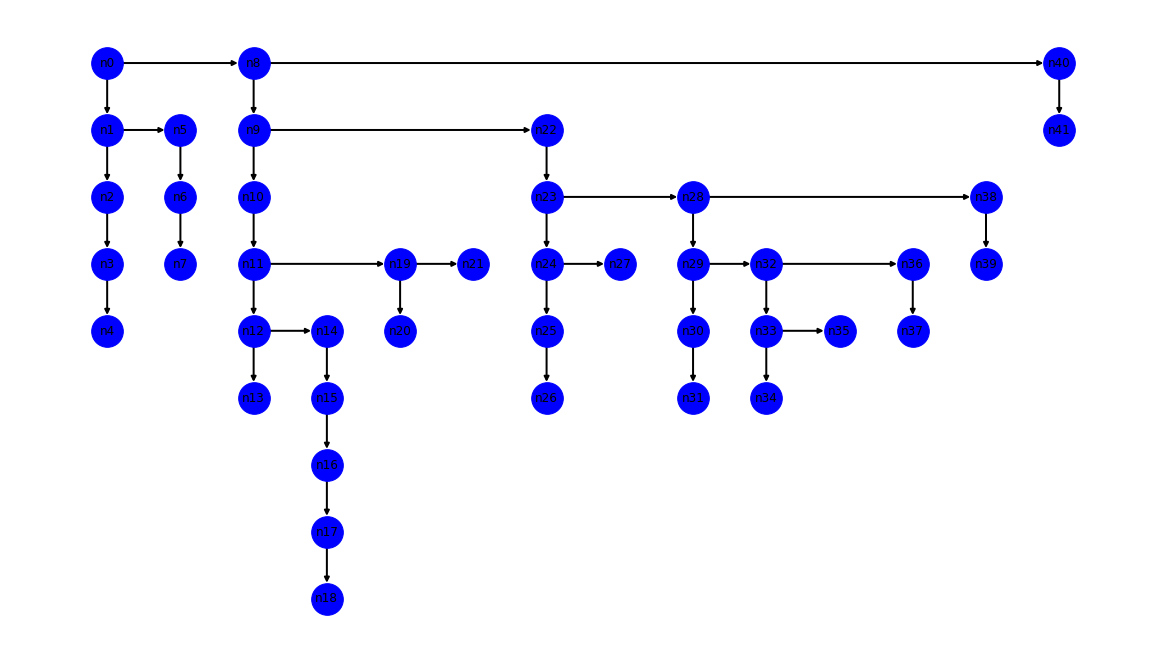

In [8]:
HV()
width = 2
node_size = 1000
plt.figure(figsize=(16,9))
nx.draw(DiGraph,pos=pos, with_labels=True, node_size=node_size, width=width, node_color='b',edge_color='black')
plt.savefig("result.png")

In [9]:
print(pos)

{'n0': array([0, 0]), 'n1': array([ 0, -1]), 'n2': array([ 0, -2]), 'n3': array([ 0, -3]), 'n4': array([ 0, -4]), 'n5': array([ 1, -1]), 'n6': array([ 1, -2]), 'n7': array([ 1, -3]), 'n8': array([2, 0]), 'n9': array([ 2, -1]), 'n10': array([ 2, -2]), 'n11': array([ 2, -3]), 'n12': array([ 2, -4]), 'n13': array([ 2, -5]), 'n14': array([ 3, -4]), 'n15': array([ 3, -5]), 'n16': array([ 3, -6]), 'n17': array([ 3, -7]), 'n18': array([ 3, -8]), 'n19': array([ 4, -3]), 'n20': array([ 4, -4]), 'n21': array([ 5, -3]), 'n22': array([ 6, -1]), 'n23': array([ 6, -2]), 'n24': array([ 6, -3]), 'n25': array([ 6, -4]), 'n26': array([ 6, -5]), 'n27': array([ 7, -3]), 'n28': array([ 8, -2]), 'n29': array([ 8, -3]), 'n30': array([ 8, -4]), 'n31': array([ 8, -5]), 'n32': array([ 9, -3]), 'n33': array([ 9, -4]), 'n34': array([ 9, -5]), 'n35': array([10, -4]), 'n36': array([11, -3]), 'n37': array([11, -4]), 'n38': array([12, -2]), 'n39': array([12, -3]), 'n40': array([13,  0]), 'n41': array([13, -1])}
